# Discriminant analyse

*Discriminant analyse zal worden verwezen door DA*

## Inleidende begrippen

### Univariate statistiek
- Statische techniek waar 1 variabele voor nodig is

### Bivariate statistiek
- Statische techniek waar 2 variabelen voor nodig zijn

- vb. Regressie analyse waarbij 2 variabelen nodig zijn om een onafhankelijke variabele (x) en een afhankelijke variabele (y) te voorspellen.

### Multivariate statistiek
- Statische techniek waar 3 of meer variabelen voor nodig zijn
- vb. Cluster analyse
    - Wanneer elk element een punt is in drie of meer dimensionale ruimte.

### Wederzijds uitsluitende deelgroepen
- Deelgroepen die niet overlappen
- vb. Mannen en vrouwen

## Wat is DA?

- DA behoort tot de **multivariate statistiek**

bv. Een bank moet beslissen of een klant een lening krijgt of niet.
- De klant wordt in 1 van 2 groepen gedeeld:
    - Kredietwaardige klanten
    - Niet-kredietwaardige klanten

De bank heeft in het verleden al leningen gegeven en heeft gegevens over de klanten die de lening hebben terugbetaald en de klanten die de lening niet hebben terugbetaald.
Stel dat deze databank 3 discriminanten (criteria) bevat die het duidelijkste aangeven of de klant waardig is of niet.
- Stabiliteit
- finianciële draagkracht
- leeftijd
Aan de hand van deze data in de databank en de waardes van de klant kan de bank beslissen of deze waardig is of niet.

## Afhankelijke en onafhankelijke variabelen
- De afhankelijke variabele is de categorie.
    *In het vorig voorbeeld, kredietwaardig of niet.* 
- De onafhankelijke variabelen zijn de gegevens die worden gebruikt om tot de categorie te komen.
    *In het vorig voorbeeld, stabiliteit, financiële draagkracht en leeftijd.*
- De afhankelijke variabele is minstens op een nominaal schaalniveau.
- De onafhankelijke variabelen zijn continue variabelen op minstens interval schaalniveau.

<center><img src="rsc/img/de-vier-meetniveaus-scribbr-1423x732-1.png" width="1000"></center>

## Karakteristieken
DA kan voor 2 verschillende doeleinden worden gebruikt:
- Om verschillen te bepalen tussen verschillende -wederzijds uitsluitende- groepen, weergeven door de afhankelijke variabele, door patronen te vinden in de onafhankelijke variabelen. Dit wordt ook wel aangeduid als **Descriptive (beschrijvende) DA**
- om te bepalen tot welke groep een nieuwe waarneming behoort. Dit wordt ook wel aangeduid als **Predictive (voorspellende) DA**

Het doel van DA is om de relatieve belangrijkheid van kenmerken/eigenschappen van elkaar te onderscheiden, te bepalen of te beschrijven.

**De onafhankelijke variabelen worden de discriminanten (criteria) genoemd.**
Het resultaat van de **descriptive DA** is een **discriminantfunctie**. Hierbij wordt de waarde voor elk van de discriminanten vermenigvuldigt met een gewicht en opgeteld.
Men kan de de discriminantfunctie toepassen op een waarneming. Neem enkel de waardes van de waarneming die overeenstemt met de discriminanten en vermenigvuldig deze met de overeenkomende gewichten.
**De som hiervan geeft de discriminantfunctiescore weer voor de waarneming.**
Deze discriminant functie wordt ook gebruikt om de **predictive DA** uit te voeren.

## Veronderstellingen

Om een DA te kunnen uitvoeren worden een aantal veronderstellingen gemaakt:
1. Er is **geen afhankelijkheid** tussen de onafhankelijke variabelen.
2. Tussen elk paar van onafhankelijke variabelen is er **lineariteit**.
3. Er is geen **co-lineariteit** tussen de onafhankelijke variabelen.
4. Multivariate **normaliteit**.
5. **Homogeniteit** van de variantie-covariantie matrixen.

## Python

```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)
```
- X = de onafhankelijke variabele
- y = de afhankelijke variabele

Voor de uitwerking gebruiken we de dataset ``biopsy.csv``
Waarbij:
- ID: sample code number (not unique)
- V1: clump thickness
- V2: uniformity of cell size
- V3: uniformity of cell shape
- V4: marginal adhesion
- V5: single epithelial cell size
- V6: bare nuclei
- V7: bland chromatin
- V8: normal nucleoli
- V9: mitoses
- class: begign (goedaardig) or malignant (kwaadaardig)

In [3]:
import os

os.chdir(r"C:\Users\zouff\PycharmProjects\Y2\Datascience2\data_aux")
import pandas as pd
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#Inlezen van gegevens
biopsy = pd.read_csv('biopsy.csv', sep=";")
biopsy.head(8)

bor = pd.read_csv('bordeaux.csv', sep=";")
bor.head(8)

,year,temperature,sun,heat,rain,quality
0,1924,3064,1201,10,361,medium
1,1925,3000,1053,11,338,bad
2,1926,3155,1133,19,393,medium
3,1927,3085,970,4,467,bad
4,1928,3245,1258,36,294,good
5,1929,3267,1386,35,225,good
6,1930,3080,966,13,417,bad
7,1931,2974,1189,12,488,bad


De eerste kolom, ID, kunnen we niet gebruiken omdat dezelfde patiënten meerdere keren voorkomen.
We gaan op deze data de DA uitvoeren. We gaan enkel de eerste 3 waardes gebruiken (V1, V2, V3)


In [10]:
X = biopsy[['V1', 'V2', 'V3']]
X
y = biopsy['class']
y

,V1,V2,V3
0,5,1,1
1,5,4,4
2,3,1,1
3,6,8,8
4,4,1,1
...,...,...,...
694,3,1,1
695,2,1,1
696,5,10,10
697,4,8,6


0         benign
1         benign
2         benign
3         benign
4         benign
         ...    
694       benign
695       benign
696    malignant
697    malignant
698    malignant
Name: class, Length: 699, dtype: object

In [11]:
from functions.functions_Y2.lda import *

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

dfs1, dfs2, dfs3, dimensions = lda_info(lda, X)

dfs1
dfs2
dfs3
print(f'De lineaire discriminant heeft {dimensions} dimensie(s)')

LinearDiscriminantAnalysis()

,prior probabilities
benign,0.655222
malignant,0.344778


,V1,V2,V3
benign,2.956332,1.325328,1.443231
malignant,7.195021,6.572614,6.560166


,LD1
V1,0.232149
V2,0.257481
V3,0.250077


De lineaire discriminant heeft 1 dimensie(s)


### Uitleg
- **Prior probabilities of groups**: berekent de kans dat een waarneming **apriori** in 1 van de 2 klassen valt. Het gaat dus over de waargenomen relatieve frequentie van de twee klassen in de steekproef. Het blijkt dat 'benign' al 65.5% keer voorkomt in de biopsie
- **Group means**: Geeft het gemiddelde van elke onafhankelijke variabelen weer per categorie. Deze gemiddelde worden bij de berekingen gebruikt om de discriminantfuncties te berekenen.
- **Coefficients of linear discriminants**: Geeft de coëfficiënten van de lineaire discriminant functie(s). Deze coëfficiënten worden gebruikt elke originele instantie te **transformeren** van de oorspronkelijke 3 dimensies (V1, V2, V3) naar 1 dimensie *$(LD_1)$*. In het **algemene geval** is het aantal *$(N)$* discriminant functies *$(LD_i)$* gelijk aan:
$$N = min(\#onafhankelijke variabelen, \#afhankelijke waarden -1)$$
- Op ons voorbeeld is dit: $N = min(3, 2-1) = 1$

### Met gebruik van de transform functie kunnen we de dataset van 3 dimensies omzetten naar 1 dimensie.

In [12]:
# map de onafhankelijke variabelen met de discriminantfuncties LDi uit het LDA-model naar hun discriminantwaarden
LD = lda.transform(X)

#combineer met de oorspronkelijke afhankelijke variabele
LD = pd.DataFrame(zip(LD[:, 0], biopsy['class']), columns=['LD1', 'Target'], index=biopsy.index)

LD

#OF

LD = ld1(lda, X, target=biopsy['class'], index=biopsy.index)

LD

#Combineren van de originele DF met de LD1 waardes
combinatie = biopsy[['V1', 'V2', 'V3']].join(LD)

combinatie

,LD1,Target
0,-0.966444,benign
1,0.556227,benign
2,-1.430741,benign
3,2.818604,benign
4,-1.198593,benign
...,...,...
694,-1.430741,benign
695,-1.662890,benign
696,3.601569,malignant
697,1.854153,malignant


,LD1,Target
0,-0.966444,benign
1,0.556227,benign
2,-1.430741,benign
3,2.818604,benign
4,-1.198593,benign
...,...,...
694,-1.430741,benign
695,-1.662890,benign
696,3.601569,malignant
697,1.854153,malignant


,V1,V2,V3,LD1,Target
0,5,1,1,-0.966444,benign
1,5,4,4,0.556227,benign
2,3,1,1,-1.430741,benign
3,6,8,8,2.818604,benign
4,4,1,1,-1.198593,benign
...,...,...,...,...,...
694,3,1,1,-1.430741,benign
695,2,1,1,-1.662890,benign
696,5,10,10,3.601569,malignant
697,4,8,6,1.854153,malignant


### Visualiseren LD1-waarden

De inspecite van de LD1-waarden laat zien dat 'benign'-instanties over het algemeen een lagere LD1-waarde hebben
<br>
Met volgende functie kunnen we de DA visualiseren:

(<Figure size 1000x500 with 1 Axes>, <Axes: xlabel='LD1'>)

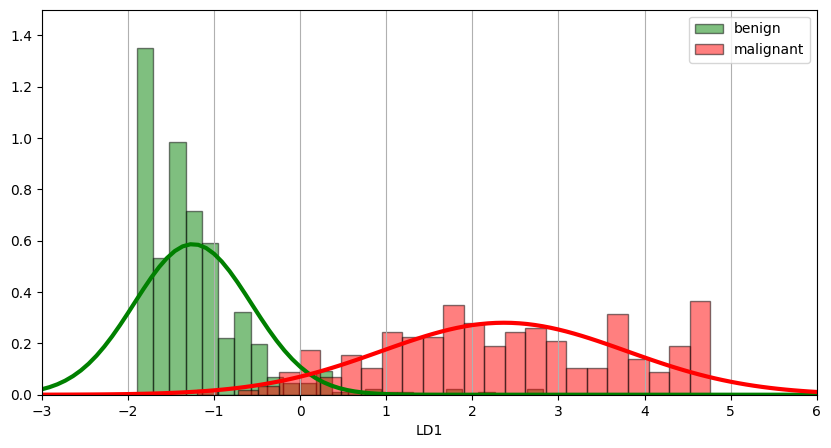

In [13]:
vis_da(LD)

#### Voorspellingen maken
Om voor bestaande observaties na te gaan in welke klasse ze terecht komen kan gebruik gemaakt worden van:

In [14]:
overview = pd.DataFrame(lda.predict_proba(X), columns=["P(benign)", "P(malignant)"]).join(
    pd.DataFrame(lda.predict(X), columns=["prediction"])).join(biopsy['class'])
overview

,P(benign),P(malignant),prediction,class
0,0.997900,0.002100,benign,benign
1,0.659175,0.340825,benign,benign
2,0.999607,0.000393,benign,benign
3,0.000543,0.999457,malignant,benign
4,0.999091,0.000909,benign,benign
...,...,...,...,...
694,0.999607,0.000393,benign,benign
695,0.999830,0.000170,benign,benign
696,0.000032,0.999968,malignant,malignant
697,0.017430,0.982570,malignant,malignant


Voor bestaande observaties kunnen we volgende functie gebruiken:

In [15]:
waarneming = pd.DataFrame([[4.41774, 3.134478, 3.207439]], columns=['V1', 'V2', 'V3'])

Chances, Predictions = pred_da(lda, waarneming)

waarneming

print(f'Kansen: {Chances}')
print(f'Voorspelling: {Predictions}')

,V1,V2,V3
0,4.41774,3.134478,3.207439


Kansen: [[0.93524597 0.06475403]]
Voorspelling: ['benign']


In [16]:
confusionMatrix, accuracy, precision, recall, f1 = evaluate_da(overview, "class")
confusionMatrix
accuracy
precision
recall
f1

class,benign,malignant,total
prediction,,,
benign,448,33,481
malignant,10,208,218
total,458,241,699


,Accuracy
Total,0.938484


,Precision
benign,0.931393
malignant,0.954128


,Recall
benign,0.978166
malignant,0.863071


,F1
benign,0.954207
malignant,0.906318
